## Load a fake dataset: the INSOMNIA study

Goal: evaluate the influence of a treatment on sleep duration in a control and insomnia group

#### Mixed repeated measures design
- Dependant variable (DV) = hours of sleep per night
- Between-factor = two-levels (Insomnia / Control)
- Within-factor = three levels (Pre, Post1, Post2)

In [1]:
import pandas as pd
# Change default display format of pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('sleep_dataset.csv')
print(df.head())

     DV     Group Time
0 5.682  Insomnia  Pre
1 5.286  Insomnia  Pre
2 4.890  Insomnia  Pre
3 6.257  Insomnia  Pre
4 4.615  Insomnia  Pre


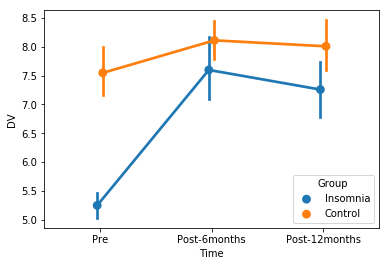

In [3]:
%matplotlib inline
import seaborn as sns
sns.pointplot(x='Time', y='DV', hue='Group', data=df, dodge=True)

## Post-hocs pairwise comparisons

- Effect size type = cohen's d
- Correction for multiple comparisons = False Discovery Rate (Benjamini–Hochberg procedure)

### Within-factor

In [4]:
from pingouin import pairwise_ttests

stats = pairwise_ttests(dv='DV', within='Time', between='Group',
                        effects='within', data=df, alpha=.05,
                        tail='two-sided', padjust='fdr_bh',
                        effsize='cohen', return_desc=False)
print(stats)

               A             B    Type  Paired  Alpha  T-val       Tail  \
0  Post-12months  Post-6months  within   1.000  0.050 -0.870  two-sided   
1  Post-12months           Pre  within   1.000  0.050  4.665  two-sided   
2   Post-6months           Pre  within   1.000  0.050  5.746  two-sided   

   p-unc  p-corr p-adjust  reject  Eff_size Eff_type  
0  0.389   0.389   fdr_bh       0    -0.204    cohen  
1  0.000   0.000   fdr_bh       1     0.941    cohen  
2  0.000   0.000   fdr_bh       1     1.145    cohen  


### Between-factor

In [5]:
stats = pairwise_ttests(dv='DV', within='Time', between='Group',
                        effects='between', data=df, alpha=.05,
                        tail='two-sided', padjust='fdr_bh',
                        effsize='cohen', return_desc=False)
print(stats)

         A         B     Type  Paired  Alpha  T-val       Tail  p-unc  p-corr  \
0  Control  Insomnia  between   0.000  0.050  5.486  two-sided  0.000   0.000   

  p-adjust  reject  Eff_size Eff_type  
0   fdr_bh       1     1.007    cohen  


### Interaction

In [6]:
stats = pairwise_ttests(dv='DV', within='Time', between='Group',
                        effects='interaction', data=df, alpha=.05,
                        tail='two-sided', padjust='fdr_bh',
                        effsize='cohen', return_desc=False)
print(stats)

            Time        A         B         Type  Paired  Alpha  T-val  \
0  Post-12months  Control  Insomnia  interaction   0.000  0.050  2.314   
1   Post-6months  Control  Insomnia  interaction   0.000  0.050  1.643   
2            Pre  Control  Insomnia  interaction   0.000  0.050  8.754   

        Tail  p-unc  p-corr p-adjust  reject  Eff_size Eff_type  
0  two-sided  0.026   0.039   fdr_bh       1     0.735    cohen  
1  two-sided  0.109   0.109   fdr_bh       0     0.522    cohen  
2  two-sided  0.000   0.000   fdr_bh       1     2.782    cohen  


### All of the above

We also set ***return_desc=True*** in order to get the mean and standard deviations in each comparisons

In [7]:
stats = pairwise_ttests(dv='DV', within='Time', between='Group',
                        effects='all', data=df, alpha=.05,
                        tail='two-sided', padjust='fdr_bh',
                        effsize='hedges', return_desc=True)
print(stats)

            Time              A             B  mean(A)  std(A)  mean(B)  \
0            NaN  Post-12months  Post-6months    7.671   1.077    7.882   
1            NaN  Post-12months           Pre    7.671   1.077    6.512   
2            NaN   Post-6months           Pre    7.882   1.005    6.512   
3            NaN        Control      Insomnia    7.890   0.953    6.701   
4  Post-12months        Control      Insomnia    8.010   0.992    7.258   
5   Post-6months        Control      Insomnia    8.113   0.779    7.599   
6            Pre        Control      Insomnia    7.548   1.015    5.246   

   std(B)         Type  Paired  Alpha  T-val       Tail  p-unc  p-corr  \
0   1.005       within   1.000  0.050 -0.870  two-sided  0.389   0.389   
1   1.418       within   1.000  0.050  4.665  two-sided  0.000   0.000   
2   1.418       within   1.000  0.050  5.746  two-sided  0.000   0.000   
3   1.412      between   0.000  0.050  5.486  two-sided  0.000   0.000   
4   1.057  interaction   0.00